In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error,confusion_matrix,f1_score


In [29]:
x = load_breast_cancer().data
y = load_breast_cancer().target

In [30]:
print(x)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [31]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [32]:
print(x.shape,y.shape)

(569, 30) (569,)


In [33]:
features = load_breast_cancer().feature_names
classes = load_breast_cancer().target_names
print('Features : ', features)
print('Classes : ', classes)

Features :  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Classes :  ['malignant' 'benign']


In [34]:
x = scale(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(455, 30) (455,) (114, 30) (114,)


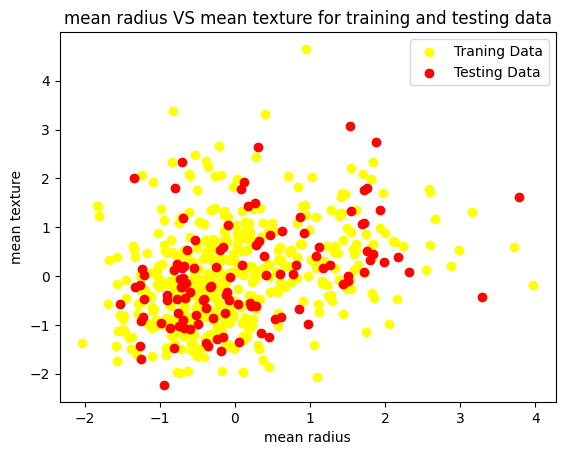

In [35]:
#plot train and test data 
plt.scatter(x_train[:,0],x_train[:,1],color='yellow',label='Traning Data',alpha=0.99)
plt.scatter(x_test[:,0],x_test[:,1],color='red',label='Testing Data',alpha=0.99)
plt.legend()
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title('mean radius VS mean texture for training and testing data')
plt.show()

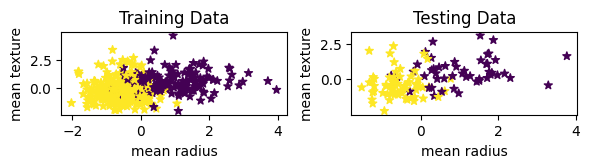

In [36]:
fig = plt.figure(figsize=(6,7))
ax1 = fig.add_subplot(5,2,1)
ax1.scatter(x_train[:,0],x_train[:,1],marker='*' ,c=y_train)
ax1.set_title('Training Data')
ax1.set_xlabel('mean radius')
ax1.set_ylabel('mean texture')

ax2 = fig.add_subplot(5,2,2)
ax2.scatter(x_test[:,0],x_test[:,1],marker='*' ,c=y_test)
ax2.set_title('Testing Data')
ax2.set_xlabel('mean radius')
ax2.set_ylabel('mean texture')

plt.tight_layout()
plt.show()

In [37]:
models_names = []
accuracies_of_models = []
mse_of_models = []
mae_of_models = []
f1_score_of_models = []


Weights :  [[-0.36415866 -0.45143985 -0.3523356  -0.41824229 -0.20858511  0.44267062
  -0.77728685 -0.88695459  0.04526153  0.40371802 -1.22128709 -0.08275152
  -0.75901668 -0.9248487  -0.26497872  0.77024028  0.11989632 -0.46218072
   0.15557645  0.74668576 -0.90579063 -1.05746587 -0.85726627 -0.84694396
  -0.80604961  0.00223036 -0.79412021 -0.95942999 -0.82642756 -0.46308374]]
Bias :  [0.33697881]
Softmax :  [[9.99996098e-01 3.90162834e-06]
 [3.20187248e-01 6.79812752e-01]
 [9.99646810e-01 3.53190130e-04]
 [8.62362951e-06 9.99991376e-01]
 [2.13586444e-03 9.97864136e-01]
 [1.89704386e-02 9.81029561e-01]
 [7.39207048e-01 2.60792952e-01]
 [9.99999256e-01 7.43846931e-07]
 [6.20817051e-02 9.37918295e-01]
 [5.23390951e-02 9.47660905e-01]]
Predicted Labels  :  [0 1 0 1 1 1 0 0 1 1]
Accuracy :  97.36842105263158
Mean Square Error :  0.02631578947368421
Mean Absolute Error :  0.02631578947368421
Median Absolute Error :  0.0
F1 Score :  0.9774436090225563


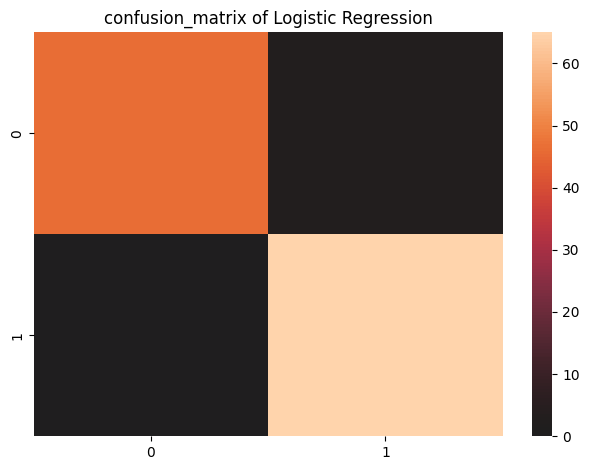

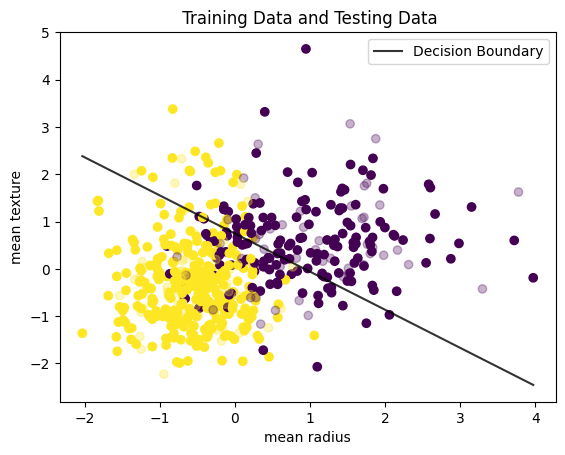

In [38]:
Logistic_Regression_model = LogisticRegression(max_iter=1000,solver='lbfgs',C=1)
Logistic_Regression_model.fit(x_train,y_train)

y_predicted_LR = Logistic_Regression_model.predict(x_test)
softmax_LR = Logistic_Regression_model.predict_proba(x_test)

weights_LR = Logistic_Regression_model.coef_
bias_LR = Logistic_Regression_model.intercept_

acc_LR= Logistic_Regression_model.score(x_test,y_test)
mse_LR = mean_squared_error(y_test,y_predicted_LR)
mae_LR = mean_absolute_error(y_test,y_predicted_LR)
med_ae_LR = median_absolute_error(y_test,y_predicted_LR)
f1_score_LR = f1_score(y_test,y_predicted_LR)

models_names.append('LogisticRegression')
accuracies_of_models.append(acc_LR*100)
mse_of_models.append(mse_LR)
f1_score_of_models.append(f1_score_LR)
mae_of_models.append(mae_LR)

print('Weights : ' , weights_LR)
print('Bias : ' , bias_LR)
print('Softmax : ' , softmax_LR[:10])
print('Predicted Labels  : ' , y_predicted_LR[:10])
print('Accuracy : ' , acc_LR*100)
print('Mean Square Error : ' , mse_LR)
print('Mean Absolute Error : ' , mae_LR)
print('Median Absolute Error : ' , med_ae_LR)
print('F1 Score : ' , f1_score_LR)

cm_LR = confusion_matrix(y_test,y_predicted_LR)
sns.heatmap(cm_LR,center=True)
plt.title('confusion_matrix of Logistic Regression')
plt.tight_layout()
plt.show()

w = Logistic_Regression_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(x_train[:,0].min(), x_train[:,0].max())
yy = a * xx - (Logistic_Regression_model.intercept_[0]) / w[1]
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,alpha=0.3)
plt.plot(xx, yy, 'k-', label='Decision Boundary',alpha=0.8)
plt.title(' Training Data and Testing Data')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.legend()
plt.show()


Weights :  [[-0.27351771 -0.30221417 -0.26059687 -0.32694142 -0.00494069  0.31259044
  -0.48623682 -0.5045439  -0.18033367  0.34795257 -0.56947897 -0.01511189
  -0.41184366 -0.50402808 -0.27925202  0.41858554  0.08401227 -0.27637219
   0.02894891  0.6419793  -0.38841645 -0.55541463 -0.44153402 -0.40491858
  -0.49897548 -0.02081308 -0.52322858 -0.39178527 -0.46099547 -0.33667203]]
Bias :  [0.1864892]
Predicted Labels  :  [0 1 0 1 1 1 0 0 1 1]
Accuracy :  97.36842105263158
Mean Square Error :  0.02631578947368421
Mean Absolute Error :  0.02631578947368421
Median Absolute Error :  0.0
F1 Score :  0.9774436090225563


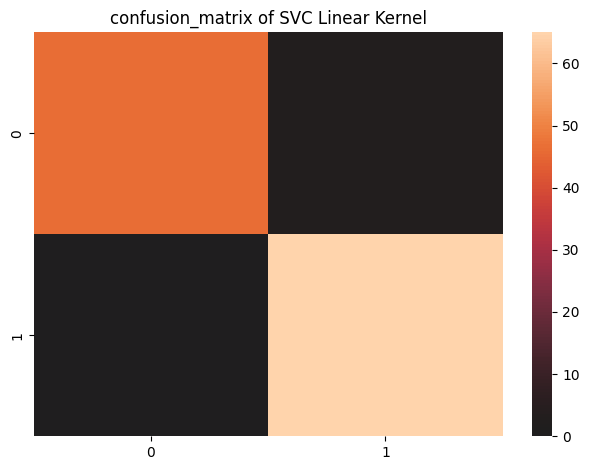

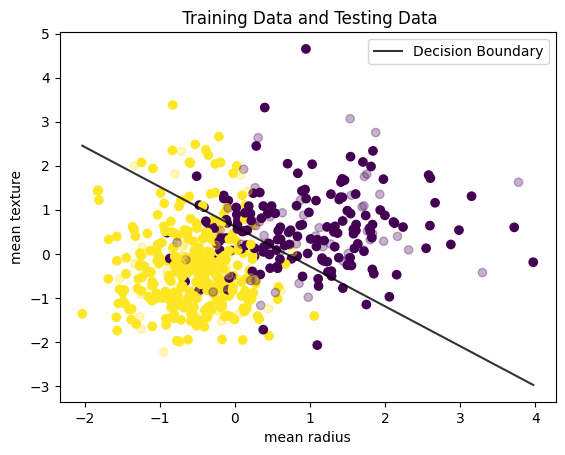

In [39]:
SVC_Linear_Kernel_model = SVC(C=0.4,kernel='linear',max_iter=1000)
SVC_Linear_Kernel_model.fit(x_train,y_train)


y_predicted_SVC_Linear = SVC_Linear_Kernel_model.predict(x_test)

weights_SVC_Linear = SVC_Linear_Kernel_model.coef_
bias_SVC_Linear = SVC_Linear_Kernel_model.intercept_

acc_SVC_Linear= SVC_Linear_Kernel_model.score(x_test,y_test)
mse_SVC_Linear = mean_squared_error(y_test,y_predicted_SVC_Linear)
mae_SVC_Linear = mean_absolute_error(y_test,y_predicted_SVC_Linear)
med_ae_SVC_Linear = median_absolute_error(y_test,y_predicted_SVC_Linear)
f1_score_SVC_Linear = f1_score(y_test,y_predicted_SVC_Linear)

models_names.append('SVC Linear kernel ')
accuracies_of_models.append(acc_SVC_Linear*100)
mse_of_models.append(mse_SVC_Linear)
f1_score_of_models.append(f1_score_SVC_Linear)
mae_of_models.append(mae_SVC_Linear)

print('Weights : ' , weights_SVC_Linear)
print('Bias : ' , bias_SVC_Linear)
print('Predicted Labels  : ' , y_predicted_SVC_Linear[:10])
print('Accuracy : ' , acc_SVC_Linear*100)
print('Mean Square Error : ' , mse_SVC_Linear)
print('Mean Absolute Error : ' , mae_SVC_Linear)
print('Median Absolute Error : ' , med_ae_SVC_Linear)
print('F1 Score : ' , f1_score_SVC_Linear)

cm_SVC_Linear = confusion_matrix(y_test,y_predicted_SVC_Linear)
sns.heatmap(cm_SVC_Linear,center=True)
plt.title('confusion_matrix of SVC Linear Kernel')
plt.tight_layout()
plt.show()

w = SVC_Linear_Kernel_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(x_train[:,0].min(), x_train[:,0].max())
yy = a * xx - (SVC_Linear_Kernel_model.intercept_[0]) / w[1]
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,alpha=0.3)
plt.plot(xx, yy, 'k-', label='Decision Boundary',alpha=0.8)
plt.title(' Training Data and Testing Data')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.legend()
plt.show()

Bias :  [-0.21503292]
Predicted Labels  :  [0 1 0 1 1 1 0 0 1 1]
Accuracy :  96.49122807017544
Mean Square Error :  0.03508771929824561
Mean Absolute Error :  0.03508771929824561
Median Absolute Error :  0.0
F1 Score :  0.9696969696969696


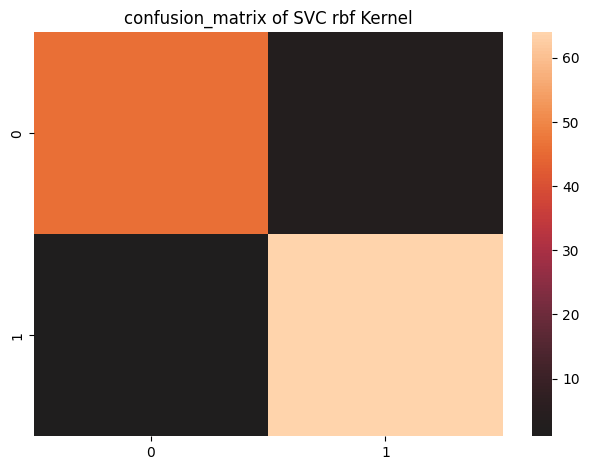

In [40]:
SVC_rbf_Kernel_model = SVC(C=1,kernel='rbf',max_iter=1000)
SVC_rbf_Kernel_model.fit(x_train,y_train)

y_predicted_SVC_rbf = SVC_rbf_Kernel_model.predict(x_test)

bias_SVC_rbf = SVC_rbf_Kernel_model.intercept_

acc_SVC_rbf= SVC_rbf_Kernel_model.score(x_test,y_test)
mse_SVC_rbf = mean_squared_error(y_test,y_predicted_SVC_rbf)
mae_SVC_rbf = mean_absolute_error(y_test,y_predicted_SVC_rbf)
med_ae_SVC_rbf = median_absolute_error(y_test,y_predicted_SVC_rbf)
f1_score_SVC_rbf = f1_score(y_test,y_predicted_SVC_rbf)

models_names.append('SVC rbf kernel ')
accuracies_of_models.append(acc_SVC_rbf*100)
mse_of_models.append(mse_SVC_rbf)
f1_score_of_models.append(f1_score_SVC_rbf)
mae_of_models.append(mae_SVC_rbf)


print('Bias : ' , bias_SVC_rbf)
print('Predicted Labels  : ' , y_predicted_SVC_rbf[:10])
print('Accuracy : ' , acc_SVC_rbf*100)
print('Mean Square Error : ' , mse_SVC_rbf)
print('Mean Absolute Error : ' , mae_SVC_rbf)
print('Median Absolute Error : ' , med_ae_SVC_rbf)
print('F1 Score : ' , f1_score_SVC_rbf)

cm_SVC_rbf = confusion_matrix(y_test,y_predicted_SVC_rbf)
sns.heatmap(cm_SVC_rbf,center=True)
plt.title('confusion_matrix of SVC rbf Kernel')
plt.tight_layout()
plt.show()


Weights :  [[-2.54014011e+00  2.25019212e+00 -2.90889176e+00 -2.81938991e+00
  -1.41973056e+00 -1.33968308e-01 -8.24561141e+00 -6.88536450e+00
  -1.52383576e+00 -3.84509529e-01 -9.33784902e+00 -1.19210844e+00
  -5.87053869e+00 -8.73672315e+00 -4.65652916e+00  8.95008602e-03
   2.37416607e+00 -7.22982477e+00 -3.66040915e+00  3.30361086e+00
  -5.34124039e+00 -1.13702057e+01 -5.52732192e+00 -5.52848934e+00
  -5.05258647e+00 -3.64517572e+00 -6.22057703e+00 -7.74625394e+00
  -1.03703689e+01 -8.00615494e+00]]
Bias :  [-1.]
Predicted Labels  :  [0 1 0 1 1 1 0 0 1 1]
Accuracy :  91.22807017543859
Mean Square Error :  0.08771929824561403
Mean Absolute Error :  0.08771929824561403
Median Absolute Error :  0.0
F1 Score :  0.9242424242424243


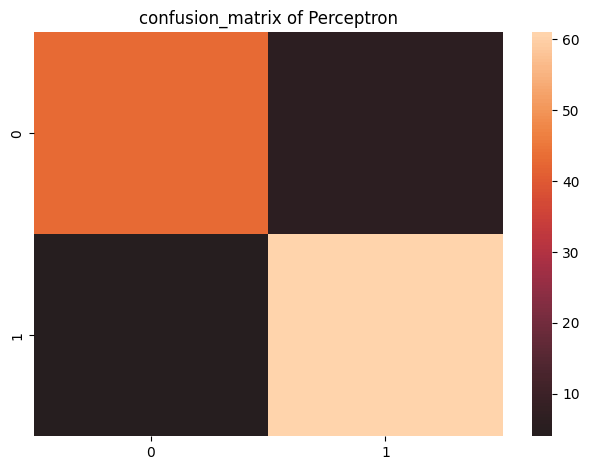

In [41]:
Perceptron_model = Perceptron(max_iter=1000)
Perceptron_model.fit(x_train,y_train)

y_predicted_PER = Perceptron_model.predict(x_test)

weights_PER = Perceptron_model.coef_
bias_PER = Perceptron_model.intercept_

acc_PER = Perceptron_model.score(x_test,y_test)
mse_PER = mean_squared_error(y_test,y_predicted_PER)
mae_PER = mean_absolute_error(y_test,y_predicted_PER)
med_ae_PER = median_absolute_error(y_test,y_predicted_PER)
f1_score_PER = f1_score(y_test,y_predicted_PER)

models_names.append('Perceptron')
accuracies_of_models.append(acc_PER*100)
mse_of_models.append(mse_PER)
f1_score_of_models.append(f1_score_PER)
mae_of_models.append(mae_PER)

print('Weights : ' , weights_PER)
print('Bias : ' , bias_PER)
print('Predicted Labels  : ' , y_predicted_PER[:10])
print('Accuracy : ' , acc_PER*100)
print('Mean Square Error : ' , mse_PER)
print('Mean Absolute Error : ' , mae_PER)
print('Median Absolute Error : ' , med_ae_PER)
print('F1 Score : ' , f1_score_PER)

cm_PER = confusion_matrix(y_test,y_predicted_PER)
sns.heatmap(cm_PER,center=True)
plt.title('confusion_matrix of Perceptron')
plt.tight_layout()
plt.show()



Weights :  [[ -1.09798353   2.19378853  -1.19809649  -0.93968497  -0.56771951
    7.51889597  -8.63230781  -6.55493269   2.54980081   5.58658664
   -9.93102389   3.72389794  -3.83524911 -12.11344974  -4.74994172
   -0.90127002   7.97997054  -7.06956512   1.20300089   7.05056885
   -5.87114491 -10.54844059  -6.19926364  -6.31697578  -2.94273432
    0.59269628  -6.49903255  -5.92138954  -8.85980472  -5.09039442]]
Bias :  [1.89556103]
Predicted Labels  :  [0 0 0 1 1 1 0 0 1 1]
Accuracy :  96.49122807017544
Mean Square Error :  0.03508771929824561
Mean Absolute Error :  0.03508771929824561
Median Absolute Error :  0.0
F1 Score :  0.9696969696969696


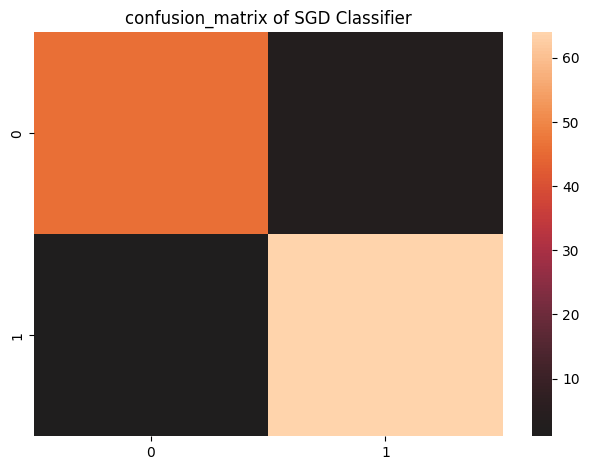

In [42]:
SGD_model = SGDClassifier(max_iter=1000)
SGD_model.fit(x_train,y_train)


y_predicted_SGD = SGD_model.predict(x_test)

weights_SGD = SGD_model.coef_
bias_SGD = SGD_model.intercept_

acc_SGD= SGD_model.score(x_test,y_test)
mse_SGD = mean_squared_error(y_test,y_predicted_SGD)
mae_SGD = mean_absolute_error(y_test,y_predicted_SGD)
med_ae_SGD = median_absolute_error(y_test,y_predicted_SGD)
f1_score_SGD = f1_score(y_test,y_predicted_SGD)

models_names.append('SGD Classifier')
accuracies_of_models.append(acc_SGD*100)
mse_of_models.append(mse_SGD)
f1_score_of_models.append(f1_score_SGD)
mae_of_models.append(mae_SGD)

print('Weights : ' , weights_SGD)
print('Bias : ' , bias_SGD)
print('Predicted Labels  : ' , y_predicted_SGD[:10])
print('Accuracy : ' , acc_SGD*100)
print('Mean Square Error : ' , mse_SGD)
print('Mean Absolute Error : ' , mae_SGD)
print('Median Absolute Error : ' , med_ae_SGD)
print('F1 Score : ' , f1_score_SGD)

cm_SGD = confusion_matrix(y_test,y_predicted_SGD)
sns.heatmap(cm_SGD,center=True)
plt.title('confusion_matrix of SGD Classifier')
plt.tight_layout()
plt.show()


Predicted Labels  :  [0 1 0 1 1 1 0 0 1 1]
Accuracy :  96.49122807017544
Mean Square Error :  0.03508771929824561
Mean Absolute Error :  0.03508771929824561
Median Absolute Error :  0.0
F1 Score :  0.9696969696969696


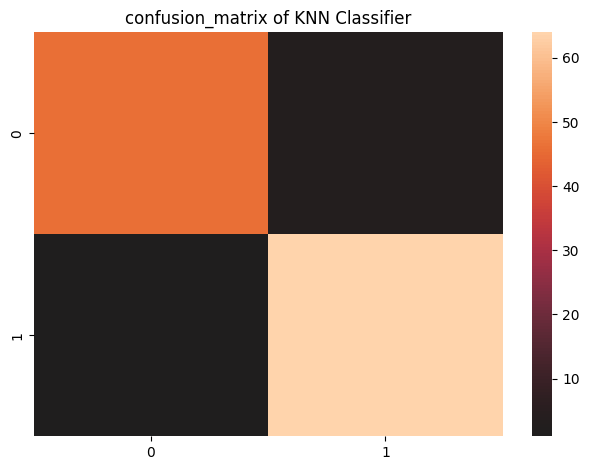

In [43]:
KNN_model = KNeighborsClassifier(n_neighbors=8)
KNN_model.fit(x_train,y_train)


y_predicted_KNN = KNN_model.predict(x_test)

acc_KNN= KNN_model.score(x_test,y_test)
mse_KNN = mean_squared_error(y_test,y_predicted_KNN)
mae_KNN = mean_absolute_error(y_test,y_predicted_KNN)
med_ae_KNN = median_absolute_error(y_test,y_predicted_KNN)
f1_score_KNN = f1_score(y_test,y_predicted_KNN)

models_names.append('KNN Classifier')
accuracies_of_models.append(acc_KNN*100)
mse_of_models.append(mse_KNN)
f1_score_of_models.append(f1_score_KNN)
mae_of_models.append(mae_KNN)

print('Predicted Labels  : ' , y_predicted_KNN[:10])
print('Accuracy : ' , acc_KNN*100)
print('Mean Square Error : ' , mse_KNN)
print('Mean Absolute Error : ' , mae_KNN)
print('Median Absolute Error : ' , med_ae_KNN)
print('F1 Score : ' , f1_score_KNN)

cm_KNN = confusion_matrix(y_test,y_predicted_KNN)
sns.heatmap(cm_KNN,center=True)
plt.title('confusion_matrix of KNN Classifier')
plt.tight_layout()
plt.show()


Predicted Labels  :  [0 1 0 1 1 1 0 0 1 1]
Accuracy :  93.85964912280701
Mean Square Error :  0.06140350877192982
Mean Absolute Error :  0.06140350877192982
Median Absolute Error :  0.0
F1 Score :  0.9473684210526316


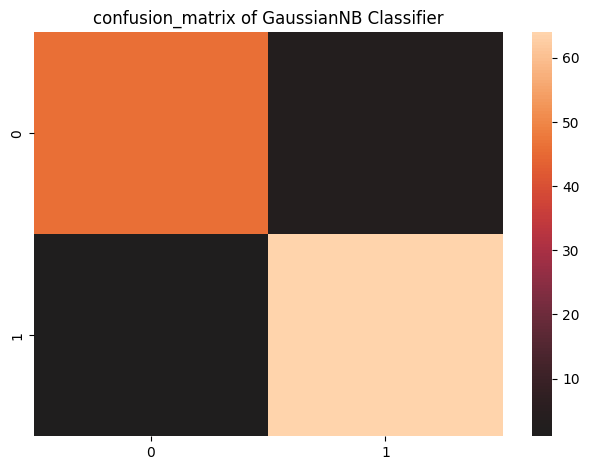

In [44]:
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(x_train,y_train)

y_predicted_GNB = GaussianNB_model.predict(x_test)

acc_GNB= GaussianNB_model.score(x_test,y_test)
mse_GNB = mean_squared_error(y_test,y_predicted_GNB)
mae_GNB = mean_absolute_error(y_test,y_predicted_GNB)
med_ae_GNB = median_absolute_error(y_test,y_predicted_GNB)
f1_score_GNB = f1_score(y_test,y_predicted_GNB)

models_names.append('GaussianNB Classifier')
accuracies_of_models.append(acc_GNB*100)
mse_of_models.append(mse_GNB)
f1_score_of_models.append(f1_score_GNB)
mae_of_models.append(mae_GNB)

print('Predicted Labels  : ' , y_predicted_GNB[:10])
print('Accuracy : ' , acc_GNB*100)
print('Mean Square Error : ' , mse_GNB)
print('Mean Absolute Error : ' , mae_GNB)
print('Median Absolute Error : ' , med_ae_GNB)
print('F1 Score : ' , f1_score_GNB)

cm_GNB = confusion_matrix(y_test,y_predicted_GNB)
sns.heatmap(cm_SGD,center=True)
plt.title('confusion_matrix of GaussianNB Classifier')
plt.tight_layout()
plt.show()


Predicted Labels  :  [0 1 0 1 1 1 0 0 1 1]
Accuracy :  94.73684210526315
Mean Square Error :  0.05263157894736842
Mean Absolute Error :  0.05263157894736842
Median Absolute Error :  0.0
F1 Score :  0.953125


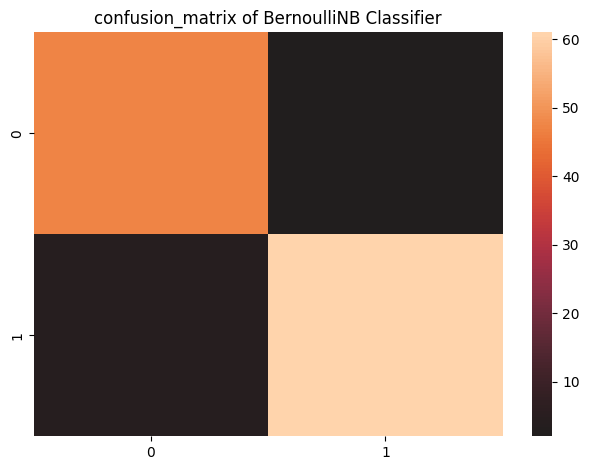

In [45]:
BernoulliNB_model = BernoulliNB(alpha=0.001)
BernoulliNB_model.fit(x_train,y_train)

y_predicted_BNB = BernoulliNB_model.predict(x_test)

acc_BNB= BernoulliNB_model.score(x_test,y_test)
mse_BNB = mean_squared_error(y_test,y_predicted_BNB)
mae_BNB = mean_absolute_error(y_test,y_predicted_BNB)
med_ae_BNB = median_absolute_error(y_test,y_predicted_BNB)
f1_score_BNB = f1_score(y_test,y_predicted_BNB)

models_names.append('BernoulliNB Classifier')
accuracies_of_models.append(acc_BNB*100)
mse_of_models.append(mse_BNB)
f1_score_of_models.append(f1_score_BNB)
mae_of_models.append(mae_BNB)

print('Predicted Labels  : ' , y_predicted_BNB[:10])
print('Accuracy : ' , acc_BNB*100)
print('Mean Square Error : ' , mse_BNB)
print('Mean Absolute Error : ' , mae_BNB)
print('Median Absolute Error : ' , med_ae_BNB)
print('F1 Score : ' , f1_score_BNB)

cm_BNB = confusion_matrix(y_test,y_predicted_BNB)
sns.heatmap(cm_BNB,center=True)
plt.title('confusion_matrix of BernoulliNB Classifier')
plt.tight_layout()
plt.show()

Softmax :  [[9.99864366e-01 1.35633981e-04]
 [1.77770914e-02 9.82222909e-01]
 [9.97904338e-01 2.09566248e-03]
 [1.07686852e-04 9.99892313e-01]
 [3.08261805e-04 9.99691738e-01]
 [1.01057606e-03 9.98989424e-01]
 [9.79856279e-01 2.01437214e-02]
 [9.99901867e-01 9.81326013e-05]
 [6.88644626e-03 9.93113554e-01]
 [7.92601154e-04 9.99207399e-01]]
Predicted Labels  :  [0 1 0 1 1 1 0 0 1 1]
Accuracy :  97.36842105263158
Mean Square Error :  0.02631578947368421
Mean Absolute Error :  0.02631578947368421
Median Absolute Error :  0.0
F1 Score :  0.9770992366412214


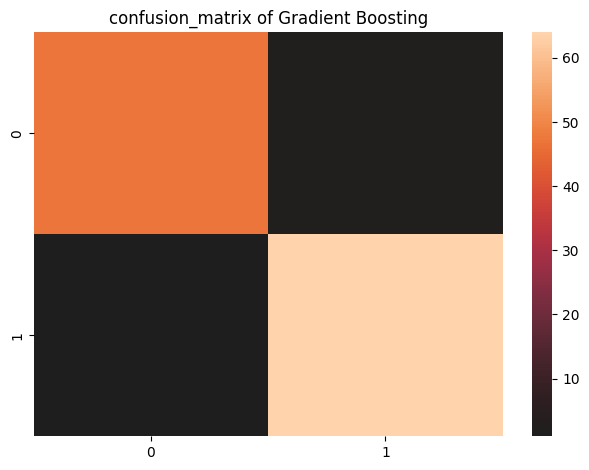

In [46]:
GradientBoosting_model = GradientBoostingClassifier(n_estimators=130,max_depth=3)
GradientBoosting_model.fit(x_train,y_train)

y_predicted_GB = GradientBoosting_model.predict(x_test)
softmax_GB = GradientBoosting_model.predict_proba(x_test)

acc_GB= GradientBoosting_model.score(x_test,y_test)
mse_GB = mean_squared_error(y_test,y_predicted_GB)
mae_GB = mean_absolute_error(y_test,y_predicted_GB)
med_ae_GB = median_absolute_error(y_test,y_predicted_GB)
f1_score_GB = f1_score(y_test,y_predicted_GB)

models_names.append('Gradient Boosting Classifier')
accuracies_of_models.append(acc_GB*100)
mse_of_models.append(mse_GB)
f1_score_of_models.append(f1_score_GB)
mae_of_models.append(mae_GB)


print('Softmax : ' , softmax_GB[:10])
print('Predicted Labels  : ' , y_predicted_GB[:10])
print('Accuracy : ' , acc_GB*100)
print('Mean Square Error : ' , mse_GB)
print('Mean Absolute Error : ' , mae_GB)
print('Median Absolute Error : ' , med_ae_GB)
print('F1 Score : ' , f1_score_GB)

cm_GB = confusion_matrix(y_test,y_predicted_GB)
sns.heatmap(cm_GB,center=True)
plt.title('confusion_matrix of Gradient Boosting')
plt.tight_layout()
plt.show()

Softmax :  [[0.9924812  0.0075188 ]
 [0.33333333 0.66666667]
 [1.         0.        ]
 [0.003861   0.996139  ]
 [0.003861   0.996139  ]
 [0.003861   0.996139  ]
 [1.         0.        ]
 [0.9924812  0.0075188 ]
 [0.003861   0.996139  ]
 [0.33333333 0.66666667]]
Predicted Labels  :  [0 1 0 1 1 1 0 0 1 1]
Accuracy :  96.49122807017544
Mean Square Error :  0.03508771929824561
Mean Absolute Error :  0.03508771929824561
Median Absolute Error :  0.0
F1 Score :  0.9692307692307692


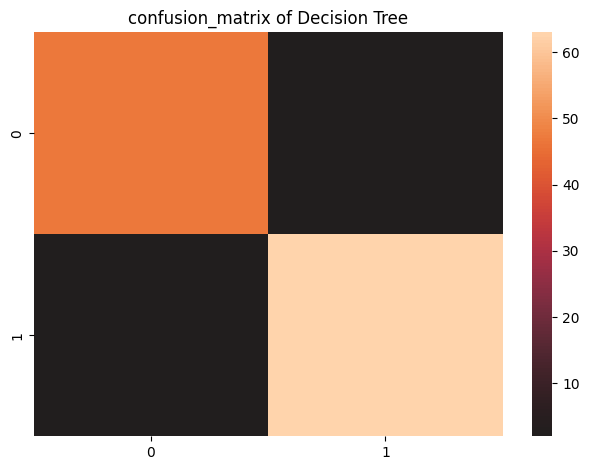

In [47]:
DecisionTree_model = DecisionTreeClassifier(max_depth=4,criterion='gini')
DecisionTree_model.fit(x_train,y_train)

y_predicted_DT = DecisionTree_model.predict(x_test)
softmax_DT = DecisionTree_model.predict_proba(x_test)

acc_DT= DecisionTree_model.score(x_test,y_test)
mse_DT = mean_squared_error(y_test,y_predicted_DT)
mae_DT = mean_absolute_error(y_test,y_predicted_DT)
med_ae_DT = median_absolute_error(y_test,y_predicted_DT)
f1_score_DT = f1_score(y_test,y_predicted_DT)

models_names.append('Decision Tree')
accuracies_of_models.append(acc_DT*100)
mse_of_models.append(mse_DT)
f1_score_of_models.append(f1_score_DT)
mae_of_models.append(mae_DT)

print('Softmax : ' , softmax_DT[:10])
print('Predicted Labels  : ' , y_predicted_DT[:10])
print('Accuracy : ' , acc_DT*100)
print('Mean Square Error : ' , mse_DT)
print('Mean Absolute Error : ' , mae_DT)
print('Median Absolute Error : ' , med_ae_DT)
print('F1 Score : ' , f1_score_DT)

cm_DT = confusion_matrix(y_test,y_predicted_DT)
sns.heatmap(cm_DT,center=True)
plt.title('confusion_matrix of Decision Tree')
plt.tight_layout()
plt.show()

Softmax :  [[0.97985561 0.02014439]
 [0.28417464 0.71582536]
 [0.90693003 0.09306997]
 [0.0177532  0.9822468 ]
 [0.04395561 0.95604439]
 [0.06787409 0.93212591]
 [0.86664262 0.13335738]
 [0.99280755 0.00719245]
 [0.02845467 0.97154533]
 [0.04184297 0.95815703]]
Predicted Labels  :  [0 1 0 1 1 1 0 0 1 1]
Accuracy :  97.36842105263158
Mean Square Error :  0.02631578947368421
Mean Absolute Error :  0.02631578947368421
Median Absolute Error :  0.0
F1 Score :  0.9770992366412214


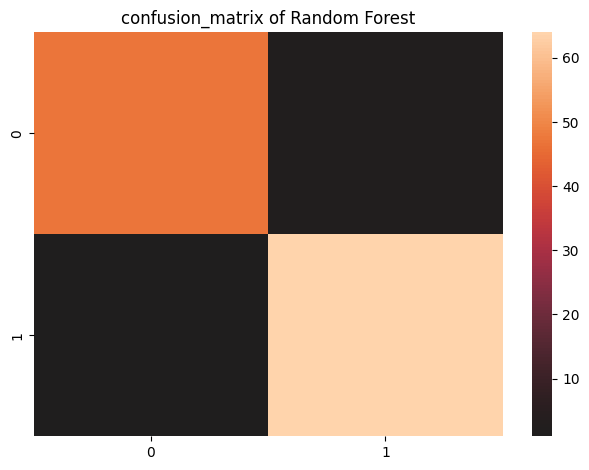

In [48]:
RandomForest_model = RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=3)
RandomForest_model.fit(x_train,y_train)


y_predicted_RF = RandomForest_model.predict(x_test)
softmax_RF = RandomForest_model.predict_proba(x_test)

acc_RF= RandomForest_model.score(x_test,y_test)
mse_RF = mean_squared_error(y_test,y_predicted_RF)
mae_RF = mean_absolute_error(y_test,y_predicted_RF)
med_ae_RF = median_absolute_error(y_test,y_predicted_RF)
f1_score_RF = f1_score(y_test,y_predicted_RF)

models_names.append('Random Forest')
accuracies_of_models.append(acc_RF*100)
mse_of_models.append(mse_RF)
f1_score_of_models.append(f1_score_RF)
mae_of_models.append(mae_RF)

print('Softmax : ' , softmax_RF[:10])
print('Predicted Labels  : ' , y_predicted_RF[:10])
print('Accuracy : ' , acc_RF*100)
print('Mean Square Error : ' , mse_RF)
print('Mean Absolute Error : ' , mae_RF)
print('Median Absolute Error : ' , med_ae_RF)
print('F1 Score : ' , f1_score_RF)

cm_RF = confusion_matrix(y_test,y_predicted_RF)
sns.heatmap(cm_RF,center=True)
plt.title('confusion_matrix of Random Forest')
plt.tight_layout()
plt.show()

Predicted Labels  :  [0 1 0 1 1 1 1 0 1 1]
Accuracy :  97.36842105263158
Mean Square Error :  0.02631578947368421
Mean Absolute Error :  0.02631578947368421
Median Absolute Error :  0.0
F1 Score :  0.9774436090225563


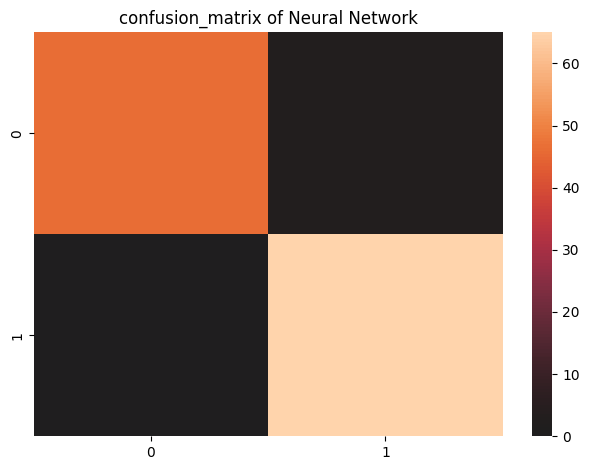

In [49]:
Neural_Network_model = MLPClassifier(hidden_layer_sizes=(100,100),solver='adam',max_iter=1000,activation='tanh')
Neural_Network_model.fit(x_train,y_train)

y_predicted_NN = Neural_Network_model.predict(x_test)

Weights = Neural_Network_model.coefs_
bias_NN = Neural_Network_model.intercepts_

acc_NN=Neural_Network_model.score(x_test,y_test)
mse_NN = mean_squared_error(y_test,y_predicted_NN)
mae_NN = mean_absolute_error(y_test,y_predicted_NN)
med_ae_NN = median_absolute_error(y_test,y_predicted_NN)
f1_score_NN = f1_score(y_test,y_predicted_NN)

models_names.append('Neural Network')
accuracies_of_models.append(acc_NN*100)
mse_of_models.append(mse_NN)
f1_score_of_models.append(f1_score_NN)
mae_of_models.append(mae_NN)

print('Predicted Labels  : ' , y_predicted_NN[:10])
print('Accuracy : ' , acc_NN*100)
print('Mean Square Error : ' , mse_NN)
print('Mean Absolute Error : ' , mae_NN)
print('Median Absolute Error : ' , med_ae_NN)
print('F1 Score : ' , f1_score_NN)

cm_NN = confusion_matrix(y_test,y_predicted_NN)
sns.heatmap(cm_NN,center=True)
plt.title('confusion_matrix of Neural Network')
plt.tight_layout()
plt.show()


Predicted Labels  :  [0 1 0 1 1 1 0 0 1 1]
Accuracy :  98.24561403508771
Mean Square Error :  0.017543859649122806
Mean Absolute Error :  0.017543859649122806
Median Absolute Error :  0.0
F1 Score :  0.9848484848484849


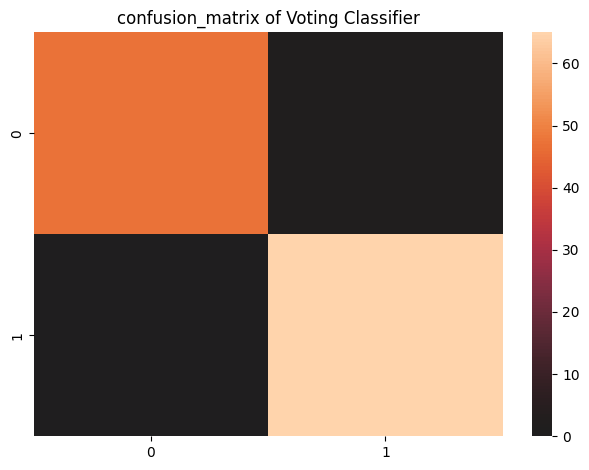

In [50]:
models = [('Logistic_Regression',Logistic_Regression_model),('SVC_Linear_Kernel',SVC_Linear_Kernel_model),('SVC_rbf_Kernel',SVC_rbf_Kernel_model),
          ('Perceptron',Perceptron_model) ,('SGD',SGD_model),('KNN',KNN_model),
          ('GaussianNB',GaussianNB_model),('BernoulliNB',BernoulliNB_model) ,
          ('GradientBoosting',GradientBoosting_model),('DecisionTree',DecisionTree_model),('RandomForest',RandomForest_model),
          ('Neural_Network',Neural_Network_model)]

Voting_model = VotingClassifier(estimators=models,weights=[1,1,1,1,1,1,1,1,1,1,2,3],voting='hard')
Voting_model.fit(x_train,y_train)

y_predicted_VO =Voting_model.predict(x_test)

acc_VO=Voting_model.score(x_test,y_test)
mse_VO = mean_squared_error(y_test,y_predicted_VO)
mae_VO = mean_absolute_error(y_test,y_predicted_VO)
med_ae_VO = median_absolute_error(y_test,y_predicted_VO)
f1_score_VO = f1_score(y_test,y_predicted_VO)

models_names.append('Voting Classifier')
accuracies_of_models.append(acc_VO*100)
mse_of_models.append(mse_VO)
f1_score_of_models.append(f1_score_VO)
mae_of_models.append(mae_VO)

print('Predicted Labels  : ' , y_predicted_VO[:10])
print('Accuracy : ' , acc_VO*100)
print('Mean Square Error : ' , mse_VO)
print('Mean Absolute Error : ' , mae_VO)
print('Median Absolute Error : ' , med_ae_VO)
print('F1 Score : ' , f1_score_VO)

cm_VO = confusion_matrix(y_test,y_predicted_VO)
sns.heatmap(cm_VO,center=True)
plt.title('confusion_matrix of Voting Classifier')
plt.tight_layout()
plt.show()


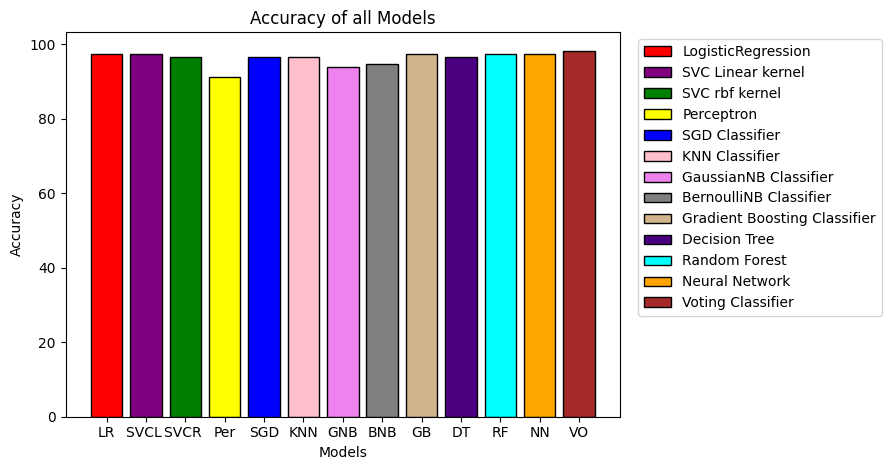

In [51]:
plt.bar(['LR', 'SVCL ', 'SVCR ', 'Per', 'SGD', 'KNN', 'GNB', 'BNB', 'GB', 'DT', 'RF', 'NN','VO'],
        accuracies_of_models,
        color=['red','purple','green','yellow','blue','pink','violet','gray','tan','indigo','cyan','orange','brown'],
        label=models_names,
        edgecolor='black')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of all Models')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02,1))
plt.show()


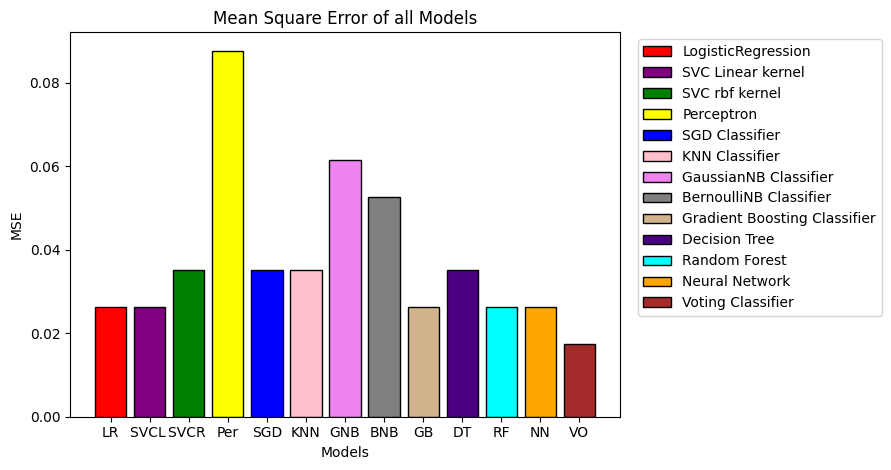

In [52]:
plt.bar(['LR', 'SVCL ', 'SVCR ', 'Per', 'SGD', 'KNN', 'GNB', 'BNB', 'GB', 'DT', 'RF', 'NN','VO'],
        mse_of_models,
        color=['red','purple','green','yellow','blue','pink','violet','gray','tan','indigo','cyan','orange','brown'],
        label=models_names,
        edgecolor='black')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Square Error of all Models')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02,1))
plt.show()

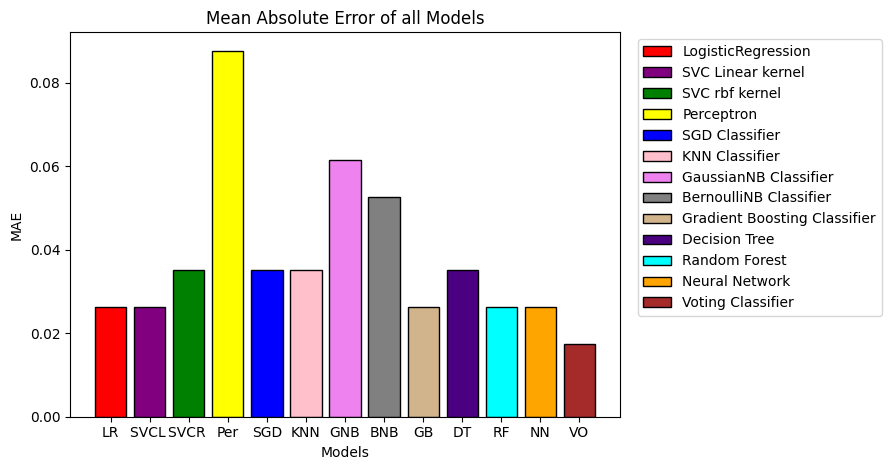

In [53]:
plt.bar(['LR', 'SVCL ', 'SVCR ', 'Per', 'SGD', 'KNN', 'GNB', 'BNB', 'GB', 'DT', 'RF', 'NN','VO'],
        mae_of_models,
        color=['red','purple','green','yellow','blue','pink','violet','gray','tan','indigo','cyan','orange','brown'],
        label=models_names,
        edgecolor='black')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Mean Absolute Error of all Models')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02,1))

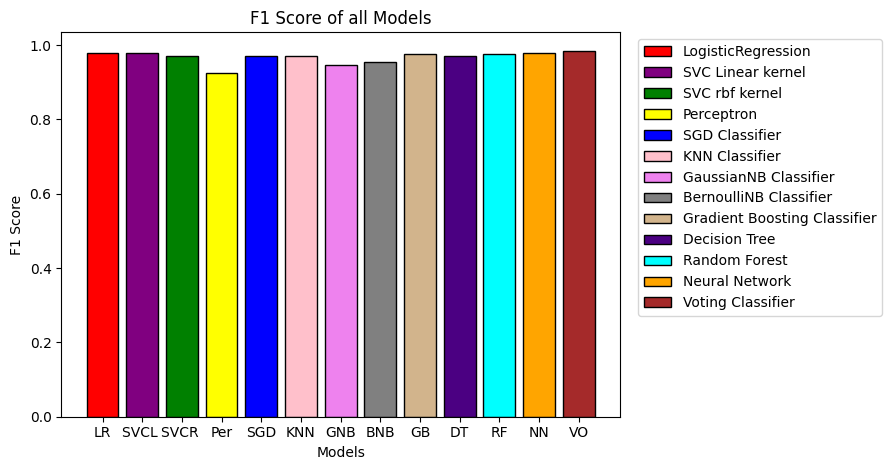

In [54]:
plt.bar(['LR', 'SVCL ', 'SVCR ', 'Per', 'SGD', 'KNN', 'GNB', 'BNB', 'GB', 'DT', 'RF', 'NN','VO'],
        f1_score_of_models,
        color=['red','purple','green','yellow','blue','pink','violet','gray','tan','indigo','cyan','orange','brown'],
        label=models_names,
        edgecolor='black')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score of all Models')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02,1))
plt.show()